In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(color_codes=True)
df_p1 = pd.read_csv("./report_prob1.csv")

In [3]:
df_p1['nums_nlogn_10'] = df_p1['nums'] * np.log10(df_p1['nums'])
df_p1['nums_nlogn_2'] = df_p1["nums"].apply(lambda x: x * np.log2(x))

In [4]:
df_p1

,nums,command,mean,stddev,median,user,system,min,max,nums_nlogn_10,nums_nlogn_2
0,10,./main < seq_tmp.txt,0.002122,0.001598,0.002048,0.001595,0.001020,0.000000,0.005337,1.000000e+01,3.321928e+01
1,11,./main < seq_tmp.txt,0.002557,0.001596,0.002949,0.002006,0.001052,0.000000,0.005329,1.145532e+01,3.805375e+01
2,12,./main < seq_tmp.txt,0.002703,0.001797,0.002826,0.002204,0.001080,0.000000,0.007824,1.295017e+01,4.301955e+01
3,13,./main < seq_tmp.txt,0.001927,0.001615,0.001408,0.001641,0.000908,0.000000,0.005442,1.448126e+01,4.810572e+01
4,14,./main < seq_tmp.txt,0.002216,0.001641,0.002278,0.001720,0.001068,0.000000,0.005577,1.604579e+01,5.330297e+01
...,...,...,...,...,...,...,...,...,...,...,...
634,9600000,./main < seq_tmp.txt,3.103203,0.015826,3.101530,2.694950,0.403975,3.080371,3.130455,6.702980e+07,2.226682e+08
635,9700000,./main < seq_tmp.txt,3.157585,0.094812,3.136101,2.756303,0.396618,3.096793,3.420077,6.777169e+07,2.251327e+08
636,9800000,./main < seq_tmp.txt,3.176006,0.015029,3.178919,2.734883,0.436548,3.155280,3.204417,6.851402e+07,2.275986e+08
637,9900000,./main < seq_tmp.txt,3.197340,0.018925,3.193439,2.784101,0.408614,3.175601,3.238107,6.925679e+07,2.300661e+08


In [9]:
from scipy import stats
r_value_n = stats.linregress(df_p1['nums'],df_p1['mean'])[2]
r_value_nlogn_2 = stats.linregress(df_p1['nums_nlogn_2'],df_p1['mean'])[2]
r_value_nlogn_10 = stats.linregress(df_p1['nums_nlogn_10'],df_p1['mean'])[2]

r_value_n**2, r_value_nlogn_2**2, r_value_nlogn_10**2

(0.9992603824726844, 0.9996423897196581, 0.9996423897196579)

Text(0.5, 1.0, 'Complexidade Temporal do Problema 1')

/tmp/ipykernel_13924/2181781355.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))
/tmp/ipykernel_13924/2181781355.py:6: RuntimeWarning: invalid value encountered in multiply
  ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))


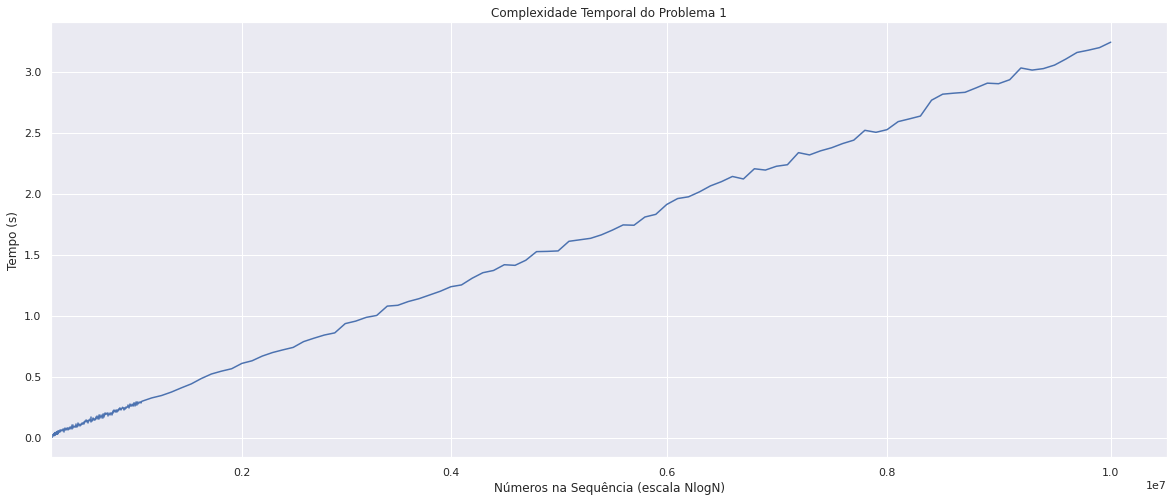

In [16]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(x="nums", y="mean", data=df_p1, err_style="bars", ci="sd")
ax.set_xlim(left=10)
ax.set_xlabel("Números na Sequência (escala NlogN)")
ax.set_ylabel("Tempo (s)")
ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))
plt.title("Complexidade Temporal do Problema 1")

In [6]:
df_p2 = pd.read_csv("./report_prob2.csv")
df_p2['nm'] = df_p2['n1'] * df_p2['n2']

In [7]:
df_p2

,n1,n2,command,mean,stddev,median,user,system,min,max,nm
0,10,10,./main < seq_tmp.txt,0.007212,0.001340,0.007556,0.004459,0.002730,0.000556,0.008499,100
1,11,11,./main < seq_tmp.txt,0.007255,0.001792,0.007866,0.004613,0.002614,0.000810,0.008020,121
2,12,12,./main < seq_tmp.txt,0.006930,0.001831,0.007579,0.004588,0.002420,0.000505,0.007760,144
3,13,13,./main < seq_tmp.txt,0.006291,0.002139,0.007191,0.004134,0.002288,0.000111,0.008264,169
4,14,14,./main < seq_tmp.txt,0.007438,0.001683,0.008031,0.005119,0.002371,0.000997,0.008232,196
...,...,...,...,...,...,...,...,...,...,...,...
356,96000,96000,./main < seq_tmp.txt,5.708002,0.005172,5.707078,5.702786,0.003550,5.701371,5.715641,9216000000
357,97000,97000,./main < seq_tmp.txt,5.829667,0.004511,5.829628,5.823988,0.003751,5.821157,5.836684,9409000000
358,98000,98000,./main < seq_tmp.txt,5.952350,0.006058,5.954871,5.946404,0.003733,5.940361,5.958789,9604000000
359,99000,99000,./main < seq_tmp.txt,6.069381,0.006302,6.068572,6.061570,0.005372,6.059555,6.077120,9801000000


Text(0.5, 1.0, 'Complexidade Temporal do Problema 2')

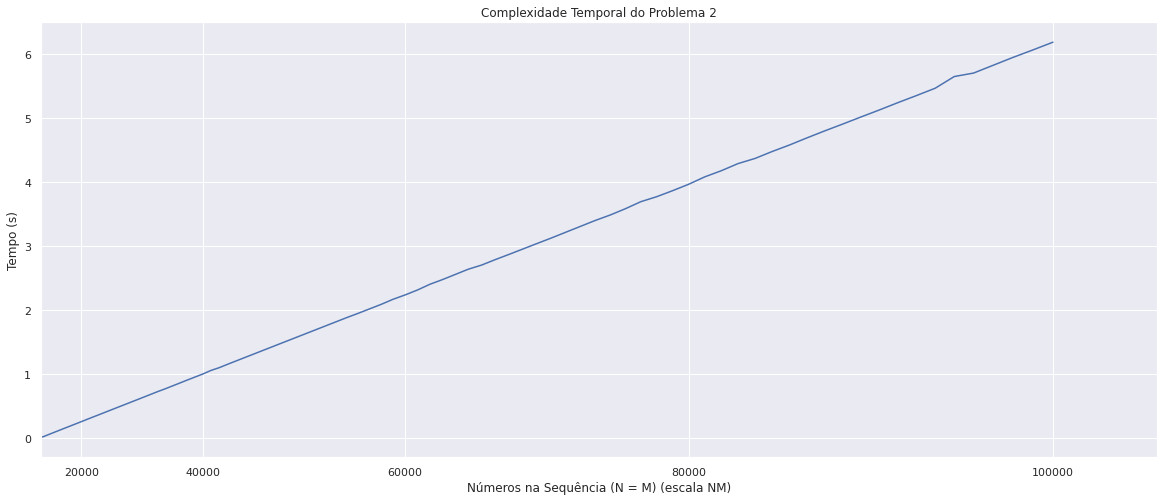

In [15]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(x="n1", y="mean", data=df_p2, err_style="bars", ci="sd")
ax.set_xlim(left=10)
ax.set_xlabel("Números na Sequência (N = M) (escala NM)")
ax.set_ylabel("Tempo (s)")
ax.set_xscale("function", functions=(lambda x: x ** 2, lambda x: x ** (1/2)))
plt.title("Complexidade Temporal do Problema 2")